In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time

In [2]:
device = torch.device("mps" if torch.backends.mps.is_available()
                      else "cuda" if torch.cuda.is_available()
                      else "cpu")

In [3]:
#reading the datafram
raw_df = pd.read_csv("datasets/dataset.csv")
df = pd.DataFrame(raw_df)

In [4]:
#stats of the dataframe
print("First five rows of the data\n", df.head())
print("Stats of the data\n", df.describe())
print("datatypes of the data\n", df.info())

First five rows of the data
   f1   f2  f3  f4   f5    f6     f7  target
0  6  148  72  35    0  33.6  0.627       1
1  1   85  66  29    0  26.6  0.351       0
2  8  183  64   0    0  23.3  0.672       1
3  1   89  66  23   94  28.1  0.167       0
4  0  137  40  35  168  43.1  2.288       1
Stats of the data
                f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null 

In [5]:
print("datatypes of the data\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB
datatypes of the data
 None


In [6]:
df.describe()

,f3,target
count,766.000000,766.000000
mean,69.118799,0.349869
std,19.376901,0.477240
min,0.000000,0.000000
25%,62.500000,0.000000
50%,72.000000,0.000000
75%,80.000000,1.000000
max,122.000000,1.000000


In [7]:
print(df['f1'].unique())
print(df['f1'].value_counts().sum())


['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
766


In [8]:
#finding the categorical variables and turning them into ints
cat = ['f1', 'f2', 'f4', 'f5', 'f6', 'f7']
for i in cat:
    df[i] = df[i].replace(r'[A-Za-z]', np.nan, regex=True) #remove any non numbers, and turn them into nans
    df[i] = pd.to_numeric(df[i], errors='coerce') #turn objects to ints
    df[i] = df[i].fillna(df[i].median())  # replace the NaN with median
#checking to make sure the type is right, and no values were lost
print(df['f1'].unique())
print(df['f1'].value_counts().sum())




[ 6.  1.  8.  0.  5.  3. 10.  2.  4.  7.  9. 11. 13. 15. 17. 12. 14.]
766


In [9]:
#all the types are now either ints or floats, no need to encode now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB


<Axes: >

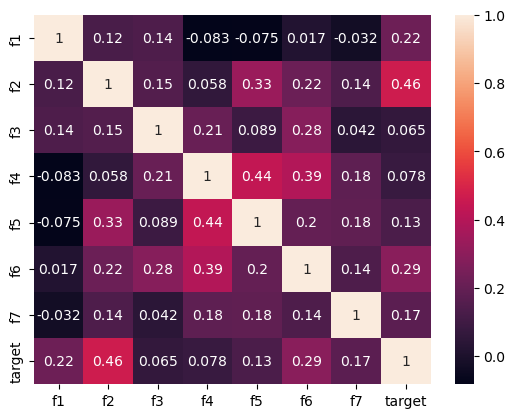

In [10]:
#corr heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)


shows the correlation matrix to see what features affects target the most, can be helpful if you want to remove some features that don't affect it as much

## Step 2 ##

In [11]:
#creates two dataframes, one for features and one for target
features = df.drop("target", axis=1)
target = df["target"]

In [12]:
#initial train test split to create training and test data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.15, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#second train test split to create validation data
X_train, X_val, y_train, y_val = train_test_split(
    #makes the split 70:15:15
    X_train, y_train, test_size=0.1764, random_state=42, stratify=y_train
)

In [14]:
#turning all the dataframes into numpy arrays
X_train = np.asarray(X_train)
X_val   = np.asarray(X_val)
X_test  = np.asarray(X_test)
y_train = np.asarray(y_train)
y_val   = np.asarray(y_val)
y_test  = np.asarray(y_test)

In [15]:
#turning the numpy arrays into tensors so they are formatted correctly for the dataloaders
SEED = 42
torch.manual_seed(SEED)
train_ds = TensorDataset(
    torch.tensor(X_train, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.float32)
)
val_ds = TensorDataset(
    torch.tensor(X_val, dtype=torch.float32),
    torch.tensor(y_val, dtype=torch.float32)
)
test_ds = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.float32))

In [16]:
#turning the tensors into dataloaders to make it work well with the neural net
SEED = 42
torch.manual_seed(SEED)

if device.type == "mps":
    dl_gen = torch.Generator(device="mps").manual_seed(SEED)
    X_train_dl = DataLoader(train_ds, batch_size=64, shuffle=True,  generator=dl_gen)
else:
    X_train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

X_val_dl  = DataLoader(val_ds,  batch_size=64, shuffle=False)
X_test_dl = DataLoader(test_ds, batch_size=64, shuffle=False)

test_ds = TensorDataset(
    torch.tensor(X_test, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.float32)
)
X_test_dl = DataLoader(test_ds, batch_size=64, shuffle=False)
    


## Part 3 ##

NN architecture:
* there will be 7 input neurons
* there will be 1 output neuron
* I'll use ReLU
* for the output layer, since its linear I wont need one
* 3 hidden layers
* 64 nodes for each layer
* I'll include dropout

In [17]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # No flatten layer needed (we already have 7 features, not an image)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(7, 64),   # Input → Hidden layer 1
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 64),  # Hidden layer 2
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 64),  # Hidden layer 3
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 1)    # Output layer (linear for regression)
        )

    def forward(self, x):
        # forward pass through the stack
        output = self.linear_relu_stack(x)
        return output.squeeze(1)

        

In [18]:
#makes sure the device works on my macbook mps, hopefully works with other computers too
device = torch.device("cpu")
gpu_idx = 0
if torch.cuda.is_available():
    device = torch.device(f"cuda:{gpu_idx}")
    print(f"Using CUDA @ device {gpu_idx}")
elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device("mps")
    print("Using Apple MPS")
else:
    print("Using CPU")
torch.set_default_device(device)

Using Apple MPS


In [19]:
model = NeuralNetwork().to(device)
print(model)

#Build model
model = NeuralNetwork()

# Move to device before creating optimizer
model = model.to(device)

# Now create the optimizer
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=64, out_features=1, bias=True)
  )
)


I am using adam optimizer, I've seen a lot of online forums talk about it being one of the best for neural nets, and I was having bad accuracy problems before, and adam increased my accuracy. I am also using BCE specifically with Logit loss. having the Logit loss allows the code to be simple.

In [20]:
from torchinfo import summary

batch_size = 16
summary(model, input_size=(batch_size, 7))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [16]                      --
├─Sequential: 1-1                        [16, 1]                   --
│    └─Linear: 2-1                       [16, 64]                  512
│    └─ReLU: 2-2                         [16, 64]                  --
│    └─Dropout: 2-3                      [16, 64]                  --
│    └─Linear: 2-4                       [16, 64]                  4,160
│    └─ReLU: 2-5                         [16, 64]                  --
│    └─Dropout: 2-6                      [16, 64]                  --
│    └─Linear: 2-7                       [16, 64]                  4,160
│    └─ReLU: 2-8                         [16, 64]                  --
│    └─Dropout: 2-9                      [16, 64]                  --
│    └─Linear: 2-10                      [16, 1]                   65
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
Total mult

In [21]:
#each epoch this is called
def epoch_step(dataloader, model, loss_fn, optimizer=None):
    #makes the train mode the optimizer I am using
    train_mode = optimizer is not None
    #this is function that signals the model to be in training mode with that optimizer
    model.train(train_mode)                   
    #keeps track of the current loss, mae, and sample 
    running_loss, running_mae, n = 0.0, 0.0, 0

    #enables gradient if we have train_mode on
    context = torch.enable_grad() if train_mode else torch.no_grad()

    #keeps track of the total loss, total correct, and total samples
    total_loss, total_correct, total_n = 0.0, 0, 0
    with context:
        for xb, yb in dataloader:
            xb, yb = xb.to(device), yb.to(device)

            if train_mode:
                optimizer.zero_grad()

            logits = model(xb)                        
            loss = loss_fn(logits.view(-1), yb.view(-1))

            if train_mode:
                loss.backward()
                optimizer.step()

            total_loss += loss.item() * xb.size(0)
            preds = (torch.sigmoid(logits.view(-1)) >= 0.5).long()
            total_correct += (preds == yb.long().view(-1)).sum().item()
            total_n += xb.size(0)

    return total_loss/total_n, total_correct/total_n


# training loop
def train_model(model, train_dl, val_dl, epochs=500):
    #keeps track of all the stats of the model
    history = {"train_loss": [], "val_loss": [], "train_mae": [], "val_mae": [], "epoch_time_sec": []}
    #keeps the best value
    best_val = float("inf")
    #remembers the best state of the model
    best_state = None

    for epoch in range(1, epochs + 1):
        t0 = time.time()
 
        #training
        train_loss, train_mae = epoch_step(train_dl, model, loss, optimizer=optimizer)

        # validation with no optimizer and no grad
        val_loss, val_mae = epoch_step(val_dl, model, loss, optimizer=None)

        
        #keeps track of the epoch so I know how long its been training
        epoch_time = time.time() - t0
        #adds all stats to the history
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_mae"].append(train_mae)
        history["val_mae"].append(val_mae)
        history["epoch_time_sec"].append(epoch_time)

        #prints all the stats of each epoch so I can visually see it
        print(f"Epoch {epoch:03d} | "
              f"train_loss={train_loss:.5f}  val_loss={val_loss:.5f} | "
              f"train_MAE={train_mae:.4f}  val_MAE={val_mae:.4f} | "
              f"lr={optimizer.param_groups[0]['lr']:.5g} | "
              f"time={epoch_time:.2f}s")

        # keeps track of best state for the validation loss
        if val_loss < best_val - 1e-8:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
           
        

    # load best weights (by validation loss)
    if best_state is not None:
        model.load_state_dict({k: v.to(device) for k, v in best_state.items()})

    print(f"Total training time: {sum(history['epoch_time_sec']):.2f}s")
    return history



In [22]:
# device check, kept getting problems before
device = torch.device("mps" if torch.backends.mps.is_available()
                      else "cuda" if torch.cuda.is_available()
                      else "cpu")

# make sure your model is on the same device as the batches
model = model.to(device)

# call my training function with dataloaders
history = train_model(model, X_train_dl, X_val_dl, epochs=200)


Epoch 001 | train_loss=1.17562  val_loss=0.81943 | train_MAE=0.5578  val_MAE=0.6522 | lr=0.001 | time=4.51s
Epoch 002 | train_loss=1.00352  val_loss=0.66550 | train_MAE=0.5522  val_MAE=0.6435 | lr=0.001 | time=0.07s
Epoch 003 | train_loss=0.81880  val_loss=0.64069 | train_MAE=0.5578  val_MAE=0.6696 | lr=0.001 | time=0.07s
Epoch 004 | train_loss=0.76542  val_loss=0.64895 | train_MAE=0.6175  val_MAE=0.6696 | lr=0.001 | time=0.07s
Epoch 005 | train_loss=0.81508  val_loss=0.65486 | train_MAE=0.5616  val_MAE=0.6696 | lr=0.001 | time=0.07s
Epoch 006 | train_loss=0.76588  val_loss=0.65786 | train_MAE=0.5970  val_MAE=0.6522 | lr=0.001 | time=0.07s
Epoch 007 | train_loss=0.69019  val_loss=0.65166 | train_MAE=0.6306  val_MAE=0.6957 | lr=0.001 | time=0.07s
Epoch 008 | train_loss=0.70402  val_loss=0.64164 | train_MAE=0.6231  val_MAE=0.7043 | lr=0.001 | time=0.07s
Epoch 009 | train_loss=0.68414  val_loss=0.63337 | train_MAE=0.6231  val_MAE=0.7130 | lr=0.001 | time=0.07s
Epoch 010 | train_loss=0.651

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
#time for evaluation 
model.eval()
total_loss, total_n = 0.0, 0
#stores all model predictions and true labels from the batches
all_logits, all_true = [], []

#makes sure no gradient
with torch.no_grad():
    #loops through test batches
    for xb, yb in X_test_dl:
        #makes sure the data can be used on your device
        xb, yb = xb.to(device), yb.to(device)
        #gets predictions
        logits = model(xb)
        #gets loss for that batch
        batch_loss = loss(logits, yb).item()
        #keeps track of total loss
        total_loss += batch_loss * xb.size(0)
        #keeps track of all samples
        total_n += xb.size(0)
        #stores the predictions and true labels on your cpu
        all_logits.append(logits.cpu())
        all_true.append(yb.cpu())

#total test loss
test_loss = total_loss / total_n
#puts all batches into one tensor, then into a numpy array, and then into a 1d array
logits = torch.cat(all_logits).numpy().ravel()
y_true = torch.cat(all_true).numpy().astype(int)
#manually does sigmoid, for some reason couldn't get it to work with the numpy function
probs = 1.0 / (1.0 + np.exp(-logits))
#sigmoid threshold
y_pred = (probs >= 0.5).astype(int)

#gets accuracy
test_acc = accuracy_score(y_true, y_pred)
#gets precision recall and f1
prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)

print(f"Test loss: {test_loss:.4f}")
print(f"Accuracy:  {test_acc:.3f}")
print(f"Precision: {prec:.3f}  Recall: {rec:.3f}  F1: {f1:.3f}")

Test loss: 0.6578
Accuracy:  0.609
Precision: 0.423  Recall: 0.268  F1: 0.328


Confusion matrix [[TN FP],[FN TP]]:
 [[59 15]
 [30 11]]


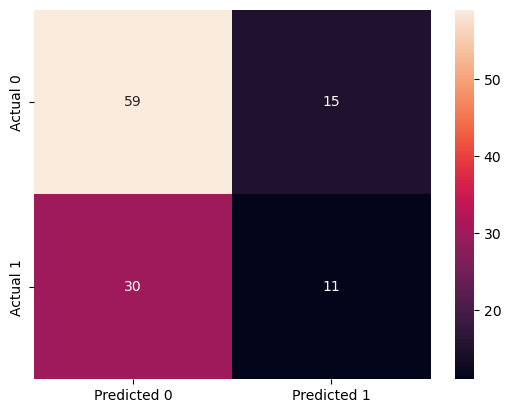

In [25]:


cm = confusion_matrix(y_true, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
print("Confusion matrix [[TN FP],[FN TP]]:\n", cm)

It seems like my model isn't good at predicting 1's but good at 0's. This can be good for certain purposes since I would rather get a false negative than a false positive

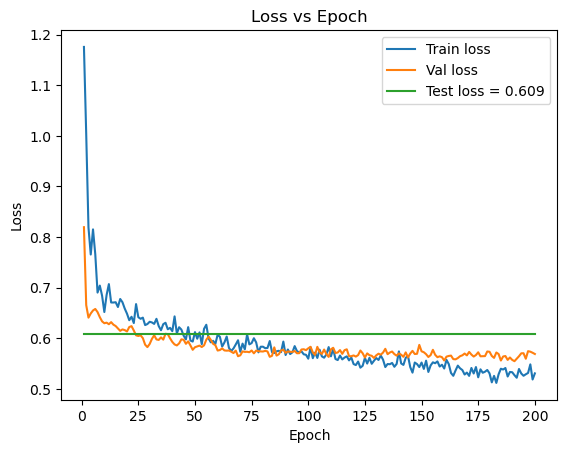

In [26]:
epochs = np.arange(1, len(history["train_loss"]) + 1)
test_acc_line = np.full_like(epochs, fill_value=test_acc, dtype=float)

plt.figure()
plt.plot(epochs, history["train_loss"], label="Train loss")
plt.plot(epochs, history["val_loss"],   label="Val loss")
plt.plot(epochs, test_acc_line,        label=f"Test loss = {test_acc:.3f}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()


val and training loss is close to each other which is good, but it constatly decreases and my test loss isn't that good either

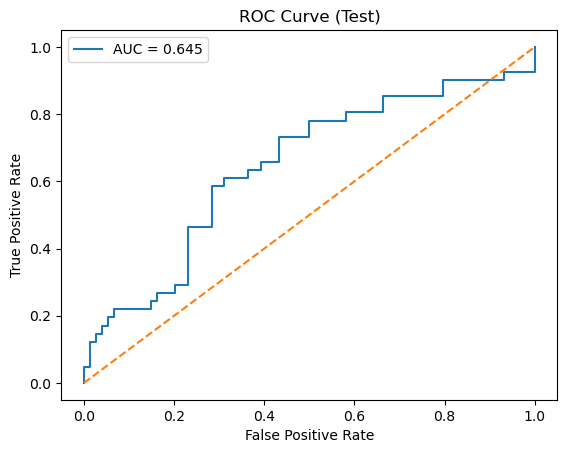

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, probs)   
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend()
plt.show()


In [28]:
torch.save(model.state_dict(), "a2_part1_weights_Jadenpeacock.pkl")

References:
https://lightning.ai/docs/torchmetrics/stable/classification/roc.html

https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

https://docs.pytorch.org/docs/stable/optim.html

https://docs.pytorch.org/docs/stable/nn.html#loss-functions

https://docs.pytorch.org/docs/stable/nn.html

https://docs.pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

https://docs.pytorch.org/docs/stable/tensors.html
